# Naive Bayes

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Enable python to import modules from parent directory
import sys
sys.path.append("..")

from src.config import *

# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None

In [2]:
data_path = os.path.join(DATA_CLEAN_PATH, "ml-curated-data.csv")
data = pd.read_csv(data_path, encoding='latin1')

In [3]:
data.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age,wage_increase
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.01909,0.016816,0.075232
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.01909,0.016816,-0.021322
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.01909,0.016816,-0.023162
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.01909,0.016816,-0.028393
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.01909,0.016816,0.028896


In [75]:
naive_bayes = GaussianNB(var_smoothing=5)

In [76]:
naive_bayes

GaussianNB(priors=None, var_smoothing=5)

In [77]:
# take only 70 percent of data
train_data = data.sample(frac=0.7)

In [98]:
train_data_x = train_data.drop(columns=['wage_increase'])
train_data_x.shape

(7885, 9)

In [99]:
train_data_y = train_data['wage_increase']

In [100]:
train_data_y.shape

(7885,)

In [101]:
# naive bayes cant detect data type
train_data_y = np.asarray(train_data_y, dtype="|S9")

In [102]:
train_data_y

array([b'-0.022271', b'-0.026403', b'0.0765708', ..., b'-0.019292',
       b'0.0385434', b'-0.018097'], dtype='|S9')

In [103]:
naive_bayes.fit(train_data_x, train_data_y)

GaussianNB(priors=None, var_smoothing=5)

In [124]:
estimates = naive_bayes.predict(train_data_x)

In [126]:
pd.to_numeric(estimates)

array([-0.033985 , -0.002154 ,  0.0765708, ...,  0.0226307, -0.03349  ,
       -0.033985 ])

In [107]:
predicted

array([-0.033985])

## Error distribution Naive Bayes

In [108]:
estimates_nb = naive_bayes.predict(train_data_x)

In [109]:
estimates_nb

array([b'-0.033985', b'-0.002154', b'0.0765708', ..., b'0.0226307',
       b'-0.033490', b'-0.033985'], dtype='|S12')

In [110]:
estimates_nb_numeric = pd.to_numeric(estimates_nb)

In [111]:
train_data_y_numeric = pd.to_numeric(train_data_y)

In [112]:
error_nb = np.asmatrix(train_data_y_numeric - estimates_nb_numeric)

In [113]:
error_nb

matrix([[ 0.011714 , -0.024249 ,  0.       , ..., -0.0419227,  0.0720334,
          0.015888 ]])

In [114]:
sme_nb = (error_nb.T * error_nb / len(error_nb)).tolist()[0][0]

In [115]:
sme_nb

0.00013721779600000004

In [116]:
sme_nb = np.sqrt(sme_nb)

In [127]:
sme_nb

0.011714000000000002

In [117]:
error_list = error_nb.tolist()

In [118]:
df_errors = pd.DataFrame({'error': [e for ls in error_nb.tolist() for e in ls]})

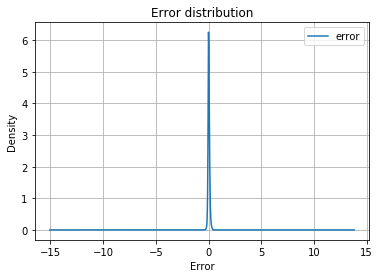

,error
count,788500.000000
mean,3.320368
std,17.732151
min,-784.033500
25%,-0.384000
50%,1.780190
75%,6.961370
max,660.029660


In [119]:
df_errors.plot.kde()
plt.title("Error distribution")
plt.xlabel("Error")
plt.grid()
plt.show()

100 * df_errors.describe()

In [120]:
test = pd.DataFrame({
    "y": pd.to_numeric(train_data_y),
    "y_estimate": pd.to_numeric(estimates_nb)
})

In [121]:
test.describe()

,y,y_estimate
count,7885.000000,7885.000000
mean,0.018954,-0.014250
std,0.201269,0.100353
min,-7.873825,-6.686025
25%,-0.033329,-0.033490
50%,0.010941,-0.021314
75%,0.060631,-0.002154
max,6.566807,0.743607


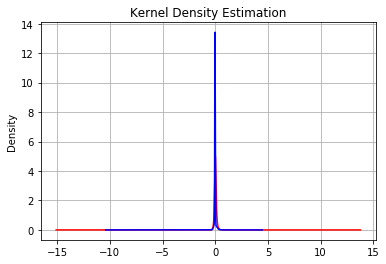

In [122]:
test.y.plot.kde(c='r')
test.y_estimate.plot.kde(c='b')
plt.title("Kernel Density Estimation")
plt.grid()
plt.show()

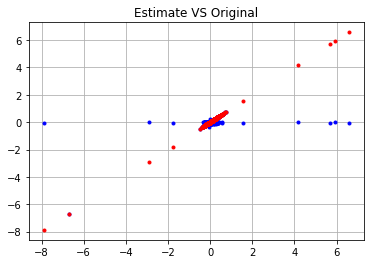

In [123]:
plt.plot(test.y, test.y_estimate, '.b')
plt.plot(test.y, test.y, '.r')
plt.title("Estimate VS Original")
plt.grid()
plt.show()

## Test multiple parametes

In [31]:
# GaussianNB(priors=None, var_smoothing=100)

In [32]:
import random

def get_random_params():
    return {
        'var_smoothing': random.choice((range(1, 500)))
    }

In [33]:
def perform_fit(df, var_smoothing):
    
    naive_bayes = GaussianNB(var_smoothing=var_smoothing)
    
    train = data.sample(frac=0.7)
    test = data.drop(train.index)
    
    train_x = train.drop(columns=['wage_increase'])
    train_y = train['wage_increase']
    
    test_x = test.drop(columns=['wage_increase'])
    test_y = test['wage_increase']
    
    train_data_y = np.asarray(train_y, dtype="|S9")  # change type
    naive_bayes.fit(train_x, train_data_y)
    
    estimates = naive_bayes.predict(train_x)
    
    train_data_y_numeric = pd.to_numeric(train_data_y)
    estimates_numeric = pd.to_numeric(estimates)
    
    # array_substract = np.subtract(train_data_y_numeric, estimates_numeric)
    error = np.asmatrix(train_data_y_numeric - estimates_numeric)
    sme = (error.T * error / len(error)).tolist()[0][0]
    rsme = np.sqrt(sme)
    
    return rsme

In [34]:
def get_error_and_params(df, loop_quantity):
    
    errors_and_params = []

    for i in range(1, loop_quantity):
        
        params = get_random_params()
        var_smoothing = params.get('var_smoothing')
        rsme = perform_fit(df, var_smoothing)
        error_and_param = {'var_smoothing': var_smoothing, 'rsme': rsme}
        errors_and_params.append(error_and_param)
    
    return errors_and_params

In [35]:
errors_and_params = get_error_and_params(data, 50)

In [36]:
errors_and_params

[{'var_smoothing': 66, 'rsme': 0.026603},
 {'var_smoothing': 419, 'rsme': 0.0308433},
 {'var_smoothing': 155, 'rsme': 0.0974822},
 {'var_smoothing': 152, 'rsme': 0.010194},
 {'var_smoothing': 15, 'rsme': 0.010582000000000001},
 {'var_smoothing': 11, 'rsme': 0.09370780000000001},
 {'var_smoothing': 376, 'rsme': 0.1196132},
 {'var_smoothing': 433, 'rsme': 0.063355},
 {'var_smoothing': 218, 'rsme': 0.0264816},
 {'var_smoothing': 420, 'rsme': 0.004365000000000004},
 {'var_smoothing': 272, 'rsme': 0.1824268},
 {'var_smoothing': 212, 'rsme': 0.1014919},
 {'var_smoothing': 121, 'rsme': 0.0706756},
 {'var_smoothing': 498, 'rsme': 0.0997212},
 {'var_smoothing': 230, 'rsme': 0.0774469},
 {'var_smoothing': 239, 'rsme': 0.25617850000000003},
 {'var_smoothing': 464, 'rsme': 0.0274327},
 {'var_smoothing': 271, 'rsme': 0.0392676},
 {'var_smoothing': 168, 'rsme': 0.6349625},
 {'var_smoothing': 47, 'rsme': 0.064272},
 {'var_smoothing': 95, 'rsme': 0.1264527},
 {'var_smoothing': 149, 'rsme': 0.0042},
 {

In [37]:
df_errors_and_params = pd.DataFrame(errors_and_params)

In [38]:
df_errors_and_params

,var_smoothing,rsme
0,66,0.026603
1,419,0.030843
2,155,0.097482
3,152,0.010194
4,15,0.010582
5,11,0.093708
6,376,0.119613
7,433,0.063355
8,218,0.026482
9,420,0.004365


In [48]:
rsmes = df_errors_and_params['rsme']

In [49]:
rsme = min(i for i in rsmes)
df_param_rsme = df_errors_and_params[df_errors_and_params.rsme == rsme]
df_param_rsme

,var_smoothing,rsme
26,5,0.0


In [143]:
data_path = os.path.join(DATA_CLEAN_PATH, "ml-curated-data.csv")
data = pd.read_csv(data_path, encoding='latin1')

In [153]:
data.shape

(11264, 10)

In [158]:
X = data.drop('wage_increase', axis=1)
y = data['wage_increase']

In [160]:
len(X)

11264

In [161]:
len(y)

11264

In [159]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [155]:
len(x_test)

3380

In [156]:
len(x_train)

7884

In [204]:
train = data.sample(frac=0.7)
test = data.sample(frac=0.7)

x_train = train.drop(columns='wage_increase')
y_train = train['wage_increase']

x_test = test.drop(columns='wage_increase')
y_test = test['wage_increase']

In [208]:
var_smoothing = df_param_rsme['var_smoothing'].values[0]

In [209]:
naive_bayes = GaussianNB(var_smoothing=var_smoothing)

In [210]:
naive_bayes

GaussianNB(priors=None, var_smoothing=5)

In [211]:
train_data_y = np.asarray(y_train, dtype="|S9")  # change type
naive_bayes.fit(x_train, train_data_y)

GaussianNB(priors=None, var_smoothing=5)

In [212]:
estimates = pd.to_numeric(naive_bayes.predict(x_train))

In [213]:
test_estimates =  pd.to_numeric(naive_bayes.predict(x_test))

In [214]:
len(estimates)

7885

In [215]:
len(test_estimates)

7885

In [196]:
real_test = pd.DataFrame({'estimates': estimates, 'test_estimates': test_estimates})

In [216]:
real_test

,estimates,test_estimates
0,-0.018347,-0.018347
1,-0.050220,-0.002435
2,-0.002435,0.069872
3,-0.050220,-0.002435
4,-0.013410,0.021488
...,...,...
3374,-0.034323,-0.061240
3375,0.182186,-0.002435
3376,-0.057550,-0.002435
3377,-0.013410,-0.002435


In [217]:
error = np.asmatrix(test_estimates - estimates)
sme = (error.T * error / len(error)).tolist()[0][0]
sme

5.1624224999999954e-05

In [218]:
np.sqrt(sme)

0.007184999999999997

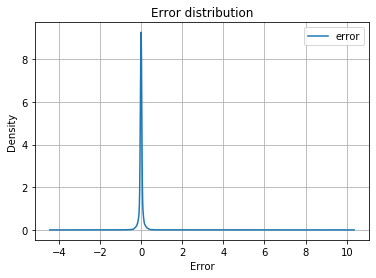

In [219]:
df_errors = pd.DataFrame({'error': [e for ls in error.tolist() for e in ls]})
df_errors.plot.kde()
plt.title("Error distribution")
plt.xlabel("Error")
plt.grid()
plt.show()

In [220]:
test_results = pd.DataFrame(
    {
    "y": estimates,
    "y_estimate": test_estimates
    }
)

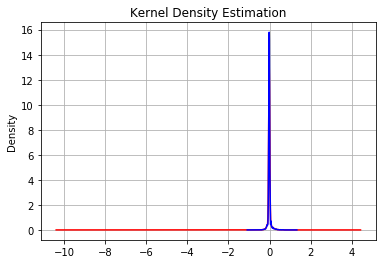

In [221]:
test_results.y.plot.kde(c='r')
test_results.y_estimate.plot.kde(c='b')
plt.title("Kernel Density Estimation")
plt.grid()
plt.show()

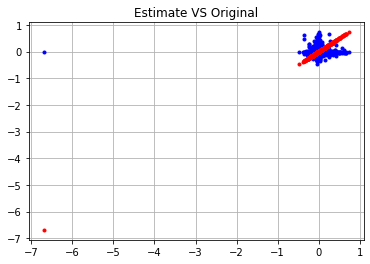

In [222]:
plt.plot(test_results.y, test_results.y_estimate, '.b')
plt.plot(test_results.y, test_results.y, '.r')
plt.title("Estimate VS Original")
plt.grid()
plt.show()

In [ ]:
# all_estimates = np.array(estimates_array).flatten()

In [ ]:
estimates_array[0]

In [ ]:
len(all_estimates)

In [ ]:
np.unique(all_estimates)

In [ ]:
all_estimates

In [ ]:
pd.to_numeric(train_y)

In [ ]:
df_errors_sqrt = pd.DataFrame({
    'var_smoothing': var_smoothing_array,
    'error': error_array 
})

In [ ]:
df_errors_sqrt.min()

In [ ]:
# df_errors_sqrt.to_csv('errors.csv')

In [ ]:
estimates = estimates_array[0]
estimates.tolist()

In [ ]:
test_results = pd.DataFrame(
    {
        "y": train_y,
        "y_estimate": estimates
    }
)

In [ ]:
plt.plot(test_results.y, test_results.y_estimate, '.b')
plt.plot(test_results.y, test_results.y, '.r')
plt.title("Estimate VS Original")
plt.grid()
plt.show()

In [ ]:
df_errors_sqrt.plot.kde()
plt.title("Error distribution")
plt.xlabel("Error")
plt.grid()
plt.show()